# Pyber Challenge

### Import CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import pathlib

# File to Load (Remember to change these)
city_data_filepath = pathlib.Path("resources/city_data.csv")
ride_data_filepath = pathlib.Path("resources/ride_data.csv")

# File to write DataFrame to for formatting for images
pyber_summary_filepath = pathlib.Path("resources/pyber_summary.xlsx")

# Read the City and Ride Data
city_df = pd.read_csv(city_data_filepath)
ride_df = pd.read_csv(ride_data_filepath)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


<hr />

## Deliverable 1: Get a Summary DataFrame 

### Total Rides, Drivers, and Fares

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_df.groupby(["type"])["ride_id"].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_df.groupby(["type"])["driver_count"].sum()
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
# 3. Get the total amount of fares for each city type
total_fares = pyber_df.groupby(["type"])["fare"].sum()
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

### Average Fares per Ride and per Driver

In [6]:
# 4. Get the average fare per ride for each city type. 
average_fare_per_ride = pyber_df.groupby(["type"])["fare"].mean()
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type.
average_fare_per_driver = (total_fares / total_drivers)
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

### Create and Format the Summary DataFrame

In [8]:
# 6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_fare_per_ride,
    "Average Fare per Driver": average_fare_per_driver
})

# 7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

# 8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


### Write to Excel to Format DataFrame for Images

In [9]:
with pd.ExcelWriter(pyber_summary_filepath, mode="w") as writer:
    pyber_summary_df.to_excel(writer, sheet_name="Pyber Summary")

<hr />

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

### Group the Fares by City Type and Date

In [10]:
# 1. Read the merged DataFrame
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
# We do this step in case there are many fares for the same city type and date 
# (in this case, there most likely won't be since the date includes the time, if
# this was a day only then there will likely be a few city type-day combos that have multiple
# fares hence the need to sum)
fare_by_date_df = pyber_df.groupby(["type","date"])[["fare"]].sum()
fare_by_date_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [12]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_by_date_df = fare_by_date_df.reset_index()
fare_by_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


### Create Pivot Table

In [13]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_by_date_df = fare_by_date_df.pivot(index="date", columns="type", values="fare")
fare_by_date_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


### Filter by Date and Convert to Datetime Index

In [14]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_by_date_df = fare_by_date_df.loc['2019-01-01':'2019-04-29']

In [15]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fare_by_date_df.index = pd.to_datetime(fare_by_date_df.index)

In [16]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_by_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


### Resample Datetime Index by Week

In [17]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_by_date_df = fare_by_date_df.resample('W').sum()
fare_by_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


### Create Multi-Line Chart: Total Fares (per week) by City Type

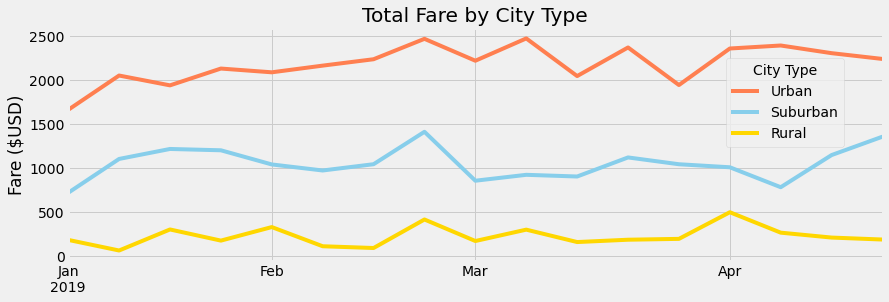

In [18]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fare_by_date_df = fare_by_date_df[['Urban', 'Suburban', 'Rural']]

ax = fare_by_date_df.plot(
    figsize=(13, 4),
    kind='line',
    title='Total Fare by City Type',
    xlabel='',
    ylabel='Fare ($USD)',
    color=['coral', 'skyblue', 'gold']
)

ax.legend(loc='center', bbox_to_anchor=(0.88, 0.68), title='City Type')
plt.savefig("analysis/PyBer_fare_summary.png", bbox_inches="tight")
plt.savefig("analysis/PyBer_fare_summary.svg", bbox_inches="tight")
plt.show()


<br>
<hr/>

## Additional Analysis: Bubble Chart of Average Fare vs Number of Rides for Each City by City Type
### Create DataFrames

In [19]:
# Create DataFrames for each city type
urban_cities_df = pyber_df[pyber_df["type"] == "Urban"]
suburban_cities_df = pyber_df[pyber_df["type"] == "Suburban"]
rural_cities_df = pyber_df[pyber_df["type"] == "Rural"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Ride Counts for Each City

In [20]:
# Get ride counts per city for each city type
urban_ride_count = urban_cities_df.groupby("city")["ride_id"].count()
suburban_ride_count = suburban_cities_df.groupby("city")["ride_id"].count()
rural_ride_count = rural_cities_df.groupby("city")["ride_id"].count()

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

### Average Fare for Each City

In [21]:
# Get average fare per city for each city type
urban_avg_fare = urban_cities_df.groupby("city")["fare"].mean()
suburban_avg_fare = suburban_cities_df.groupby("city")["fare"].mean()
rural_avg_fare = rural_cities_df.groupby("city")["fare"].mean()

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

### Average Number of Drivers for Each City

In [22]:
# Get average number of drivers per city for each city type
urban_driver_count = urban_cities_df.groupby("city")["driver_count"].mean()
suburban_driver_count = suburban_cities_df.groupby("city")["driver_count"].mean()
rural_driver_count = rural_cities_df.groupby("city")["driver_count"].mean()

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

### Bubble Chart

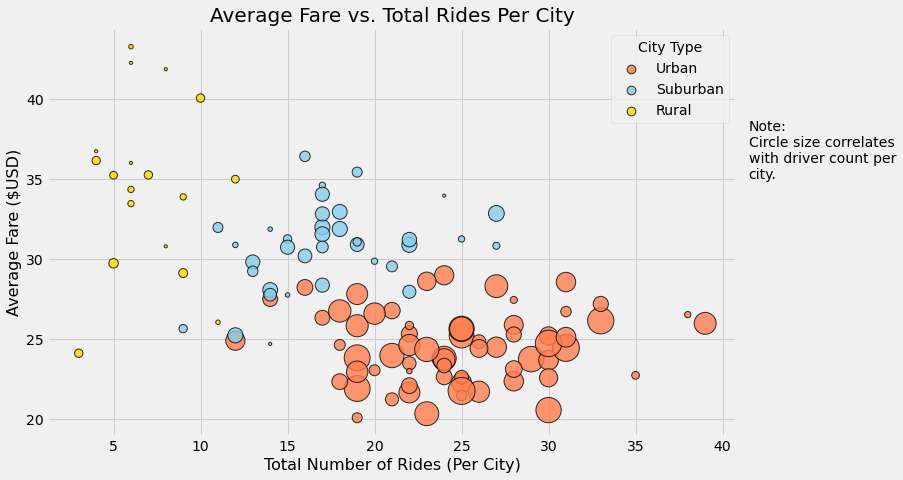

In [23]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Build the bubble chart
plt.subplots(figsize=(11, 7))

# Plot urban cities
plt.scatter(x=urban_ride_count,
            y=urban_avg_fare,
            s=10*urban_driver_count,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban")

# Plot suburban cities
plt.scatter(x=suburban_ride_count,
            y=suburban_avg_fare,
            s=10*suburban_driver_count,
            c="skyblue",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Suburban")

# Plot rural cities
plt.scatter(x=rural_ride_count,
            y=rural_avg_fare,
            s=10*rural_driver_count,
            c="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Rural")

# Add graph properties
plt.title(label="Average Fare vs. Total Rides Per City", fontsize=20)
plt.xlabel(xlabel="Total Number of Rides (Per City)", fontsize=16)
plt.ylabel(ylabel="Average Fare ($USD)", fontsize=16)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize=14,
                  scatterpoints=1,
                  loc="best",
                  title="City Type")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(14)

# Incorporate a text label about circle size
plt.text(41.5, 35, "Note:\nCircle size correlates\nwith driver count per\ncity.", fontsize=14)

# Save the figure
plt.savefig("analysis/PyBer_fare_vs_rides_bubble_chart.png", bbox_inches="tight")
plt.savefig("analysis/PyBer_fare_vs_rides_bubble_chart.svg", bbox_inches="tight")
plt.show()